<a href="https://colab.research.google.com/github/tranhuuan170302/building-model-predict-campaign-telemarketing-banking-marketing-direct-/blob/main/analyst_predict_telemarketingBanking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I.import library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
sns.set()
%matplotlib inline

# II. Summary dataset
Input variables:
   ### bank client data:
   1 - age (numeric)<br>
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")<br>
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)<br>
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")<br>
   5 - default: has credit in default? (categorical: "no","yes","unknown")<br>
   6 - housing: has housing loan? (categorical: "no","yes","unknown")<br>
   7 - loan: has personal loan? (categorical: "no","yes","unknown")<br>
   ### related with the last contact of the current campaign:
   8 - contact: contact communication type (categorical: "cellular","telephone") <br>
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")<br>
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")<br>
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>
   ### other attributes:
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
  14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")<br>
   ### social and economic context attributes
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)  <br>   
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)   <br>  
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
  20 - nr.employed: number of employees - quarterly indicator (numeric)<br>

  Output variable (desired target):<br>
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")<br>

# III. Data overview

In [ ]:
df = pd.read_csv("/content/bank-additional-full.csv", sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### 1.describe data

In [ ]:
df.describe().style.background_gradient()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.024060,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.421250,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
# show infomaion data
def missing_value(x):
    listSummary = []
    for i in x.columns:
        row = x[i].shape[0]
        missingVal = x[i].isna().sum()
        unique = len(x[i].unique())
        typeCol = str(x[i].dtype)
        percentageMissingVal = x[i].isna().sum()/x.shape[0]*100
        listSummary.append([i, row,typeCol,unique, missingVal, percentageMissingVal])
    return pd.DataFrame(listSummary, columns = ['Name Columns', 'Total row', 'type col', 'Total unique', 'Total miss val', 'percentage missing value'])


In [ ]:
missing_value(df)

,Name Columns,Total row,type col,Total unique,Total miss val,percentage missing value
0,age,41188,int64,78,0,0.0
1,job,41188,object,12,0,0.0
2,marital,41188,object,4,0,0.0
3,education,41188,object,8,0,0.0
4,default,41188,object,3,0,0.0
5,housing,41188,object,3,0,0.0
6,loan,41188,object,3,0,0.0
7,contact,41188,object,2,0,0.0
8,month,41188,object,10,0,0.0
9,day_of_week,41188,object,5,0,0.0


Take-away: 
- the dataset is not missing value.<br>
- the dataset have 13 feature is dtypes 'categorical'.<br>
- the dataset have 8 feature is dtypes 'numerical'. <br>

In [ ]:
nameObj = df.select_dtypes('object').columns
for i in nameObj:
    print('=============================', i, '========================')
    print(df[i].value_counts())

============================= job ========================
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
============================= marital ========================
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
============================= education ========================
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
============================= default ========================
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
=========

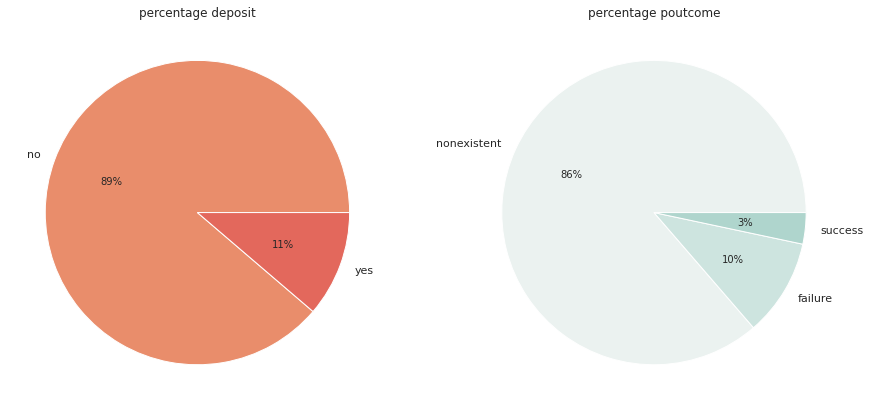

In [ ]:
fig = plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
# define Seaborn color palette to use
palette_color = sns.color_palette("flare")
plt.title('percentage deposit')
# plotting data on chart
plt.pie(df['y'].value_counts().values, labels=df['y'].value_counts().index, colors=palette_color, autopct='%.0f%%')
  


plt.subplot(1,2,2)
# define Seaborn color palette to use
palette_color = sns.color_palette("light:#5A9")
plt.title('percentage poutcome')
# plotting data on chart
plt.pie(df['poutcome'].value_counts().values, labels=df['poutcome'].value_counts().index, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()

# IV. problem
- The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.
- Based on the dataset. we can diagnostic this data having the problem about marketing direct don't effective.

# V. Find relationship between feature to deposit

*Cotegorical*

In [ ]:
categoricalFeature = [feature for feature in df.select_dtypes('object').columns if (feature not in ['y'])]

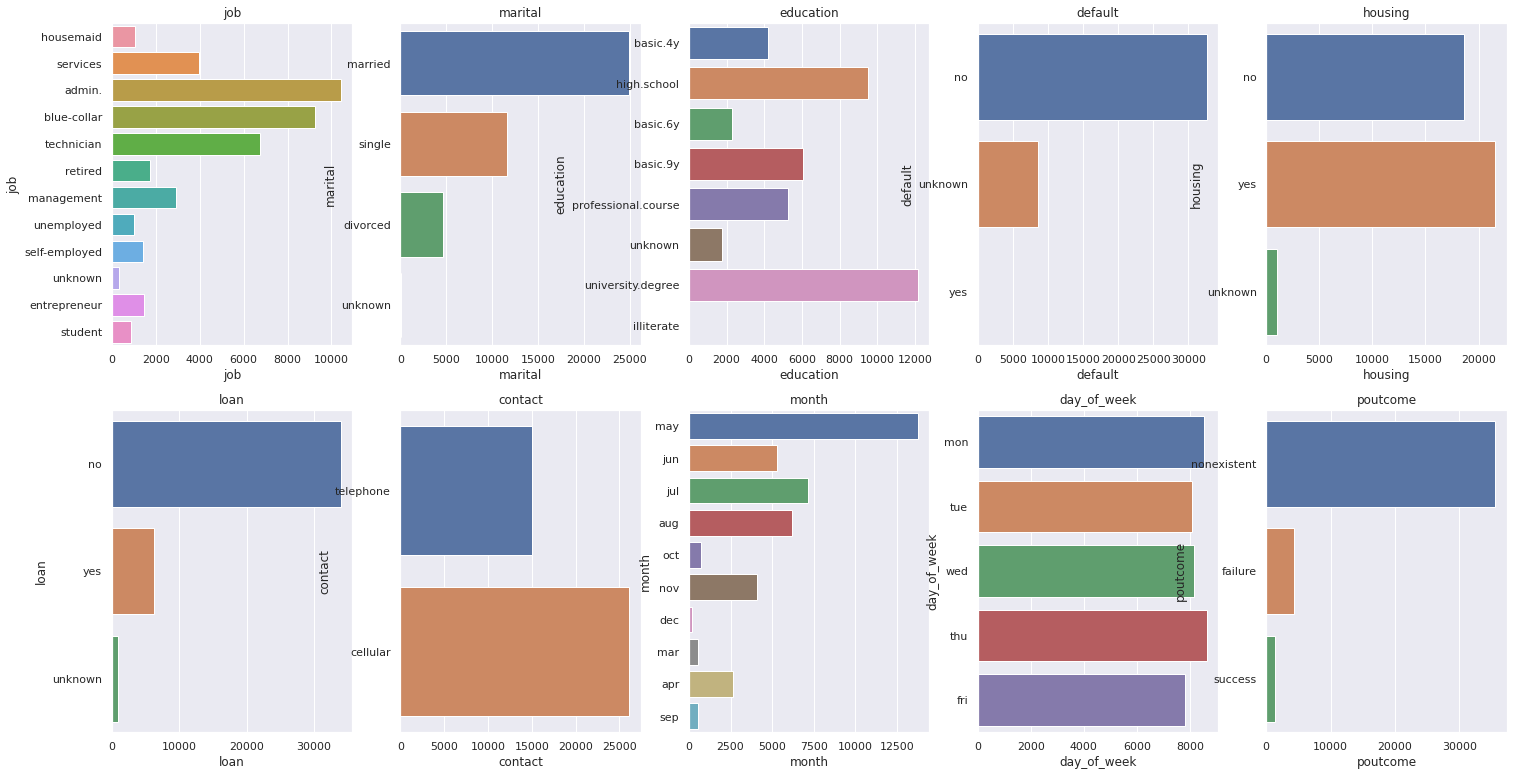

In [ ]:
fig = plt.figure(figsize = (25,70))
plotNumber = 1
for feature in categoricalFeature:
    ax = plt.subplot(10,5, plotNumber)
    sns.countplot(y = feature, data = df)
    plt.title(feature)
    plt.xlabel(feature)
    plotNumber +=1
plt.show()

<Figure size 1080x5760 with 0 Axes>

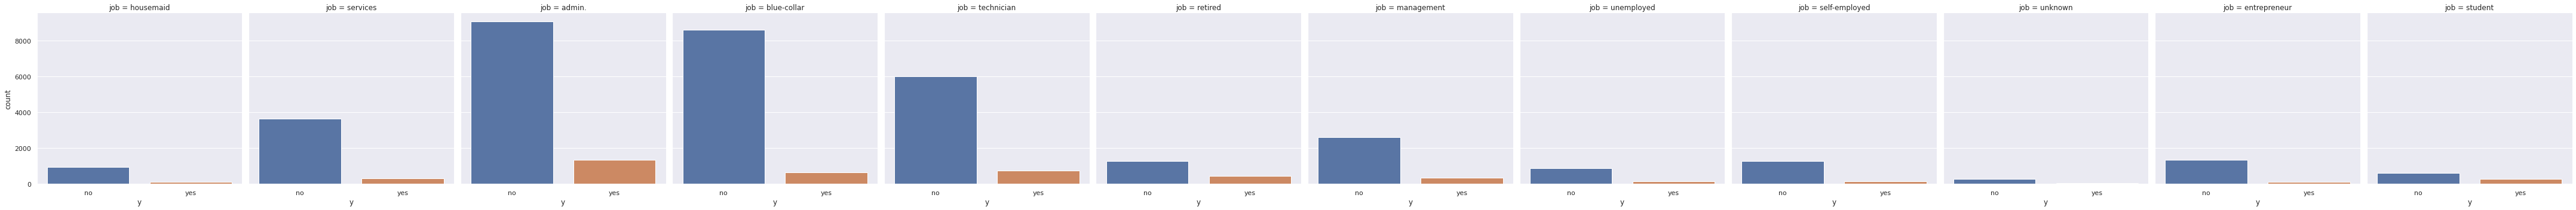

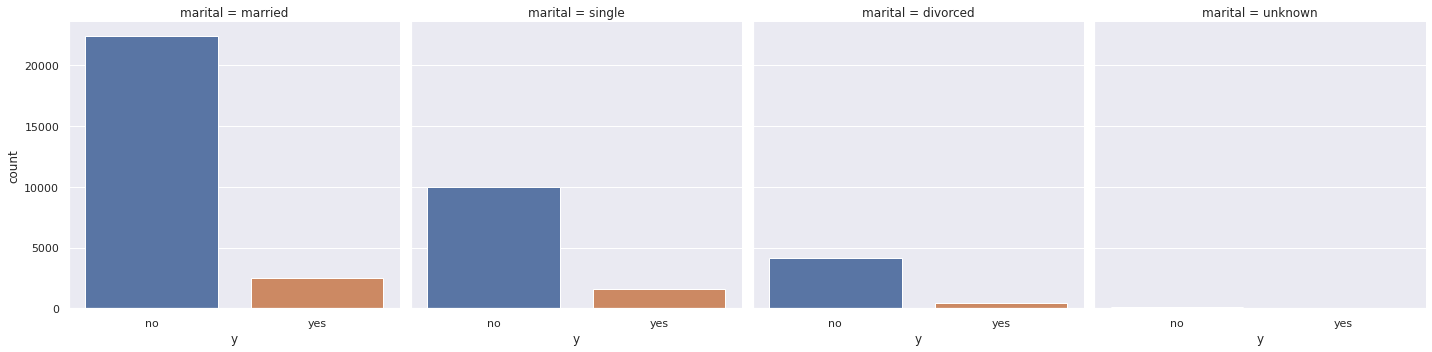

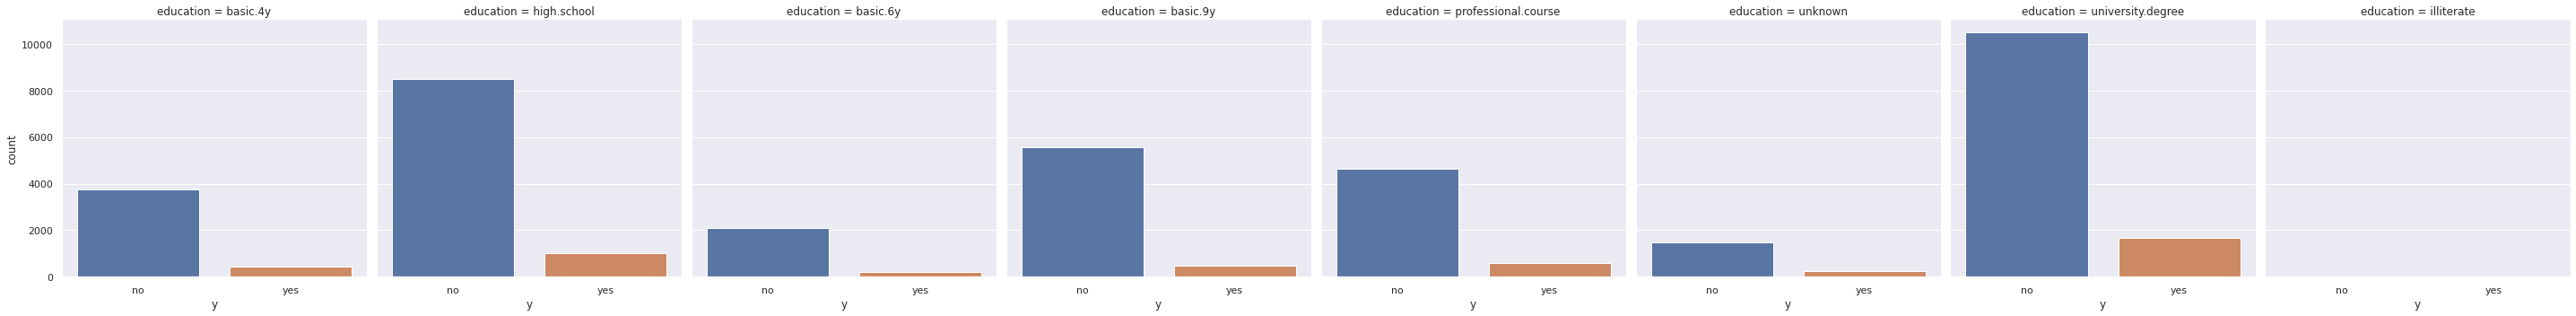

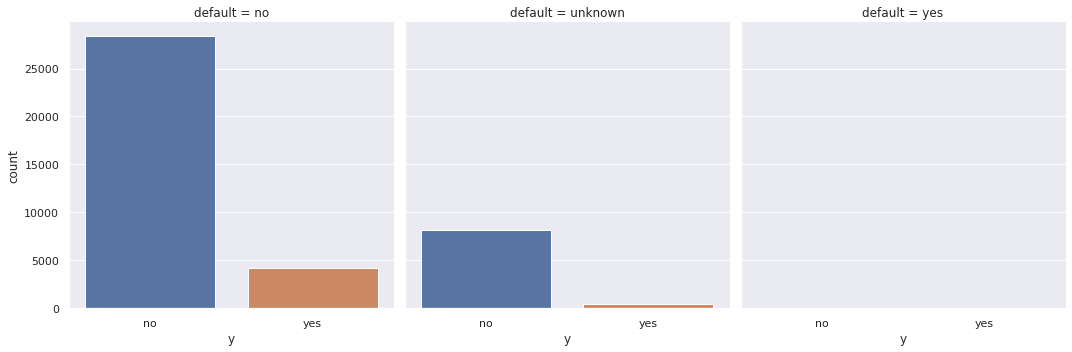

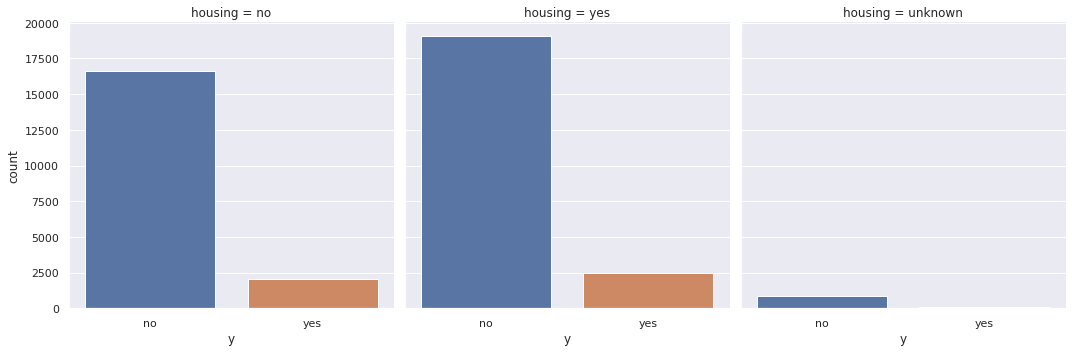

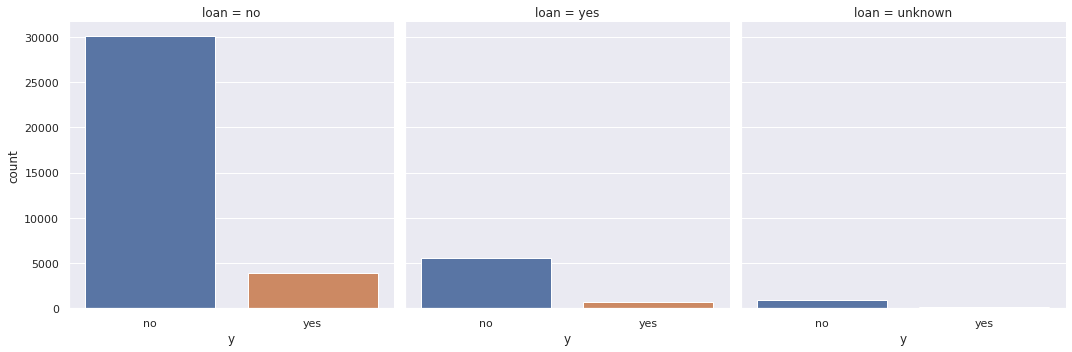

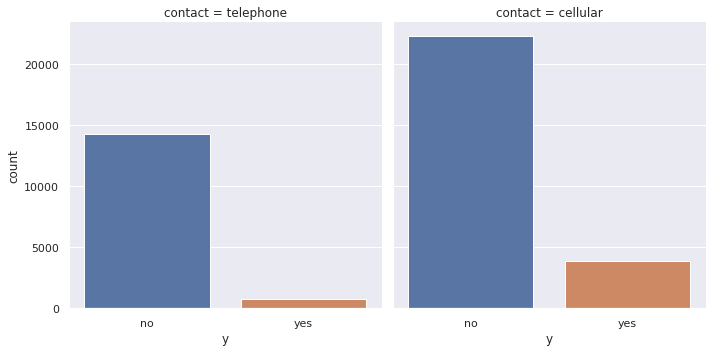

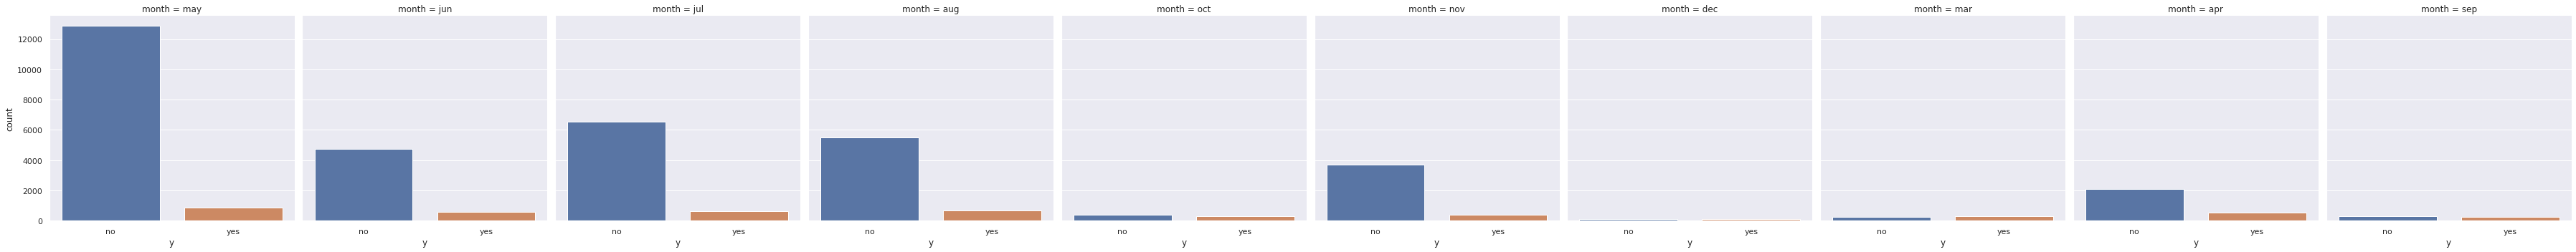

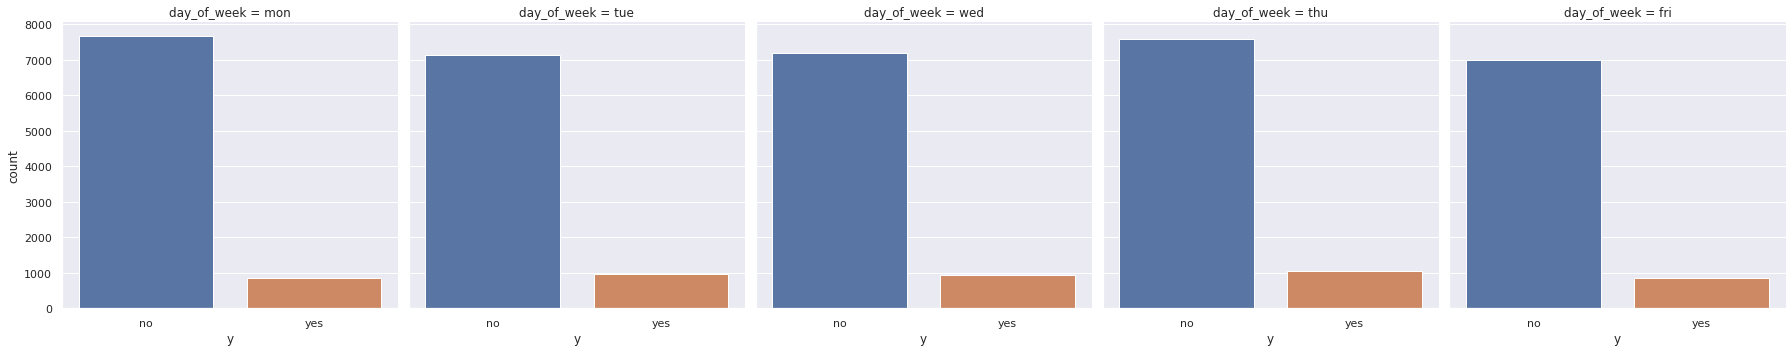

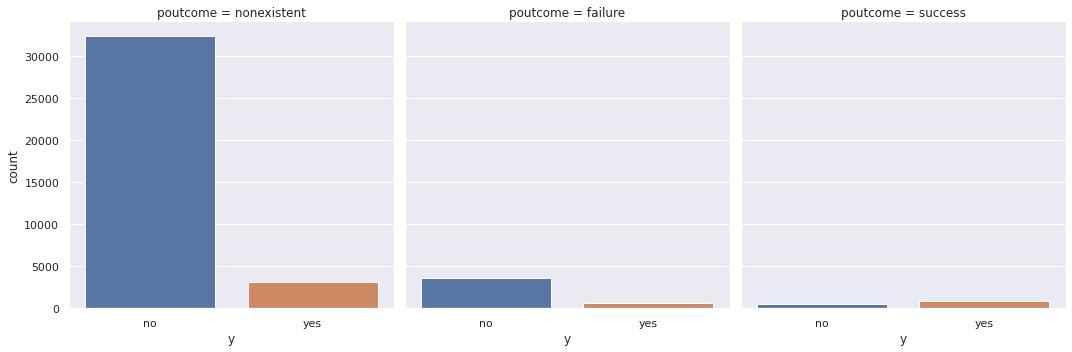

In [ ]:
fig = plt.figure(figsize = (15,80))
for feature in categoricalFeature:
    sns.catplot(x="y", col=feature, kind='count', data=df)
plt.show()

*numerical*

In [ ]:
numericalFeature = [feature for feature in df.select_dtypes([np.int, np.float]) ]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/dev

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

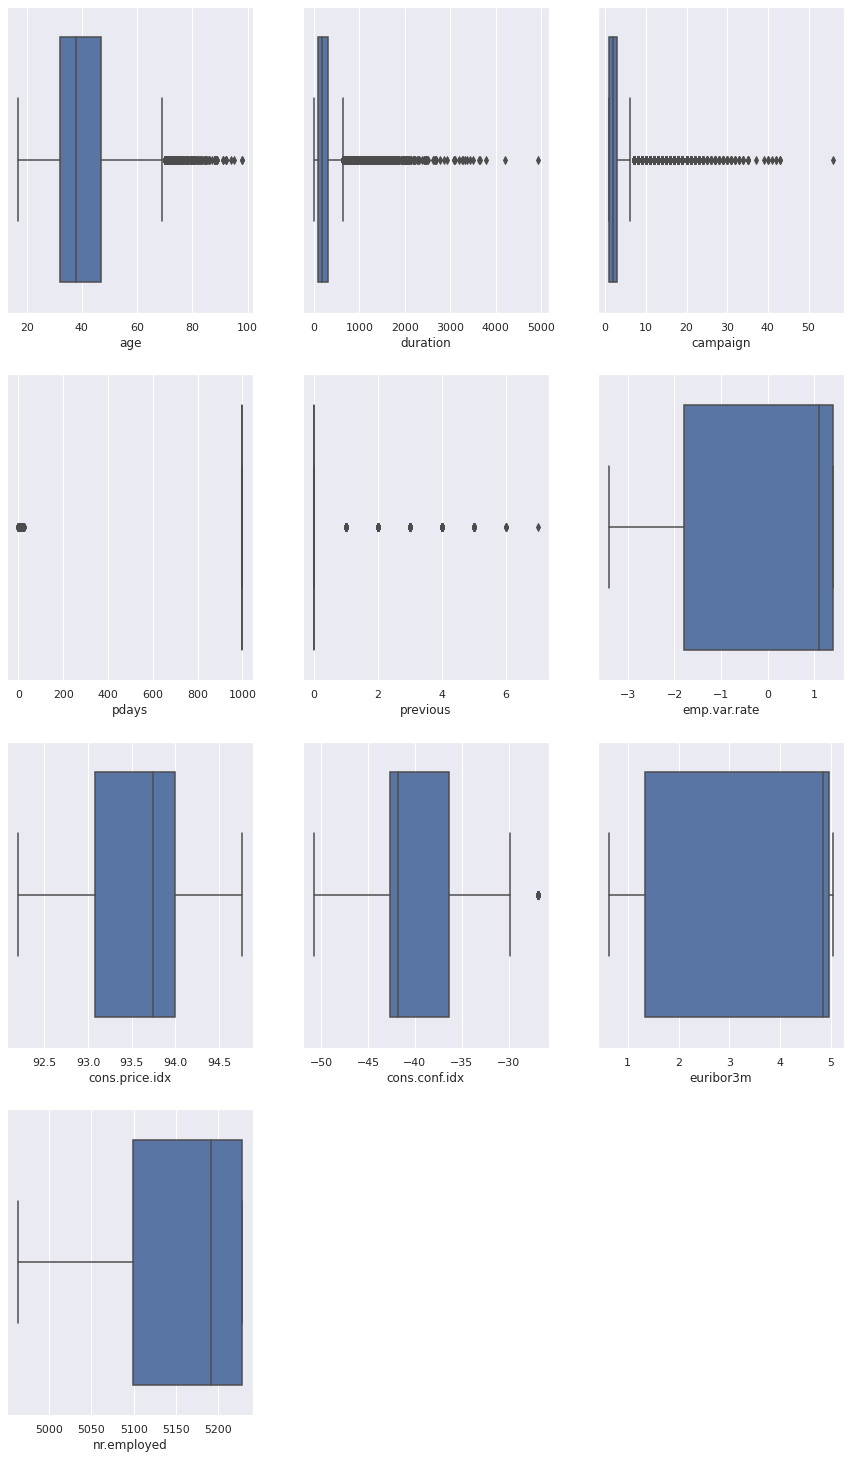

In [ ]:
fig = plt.figure(figsize = (15,80))
numberPlot = 1
for feature in numericalFeature:
    plt.subplot(12,3, numberPlot)
    sns.boxplot(df[feature])
    plt.xlabel(feature)
    numberPlot += 1
plt.show()

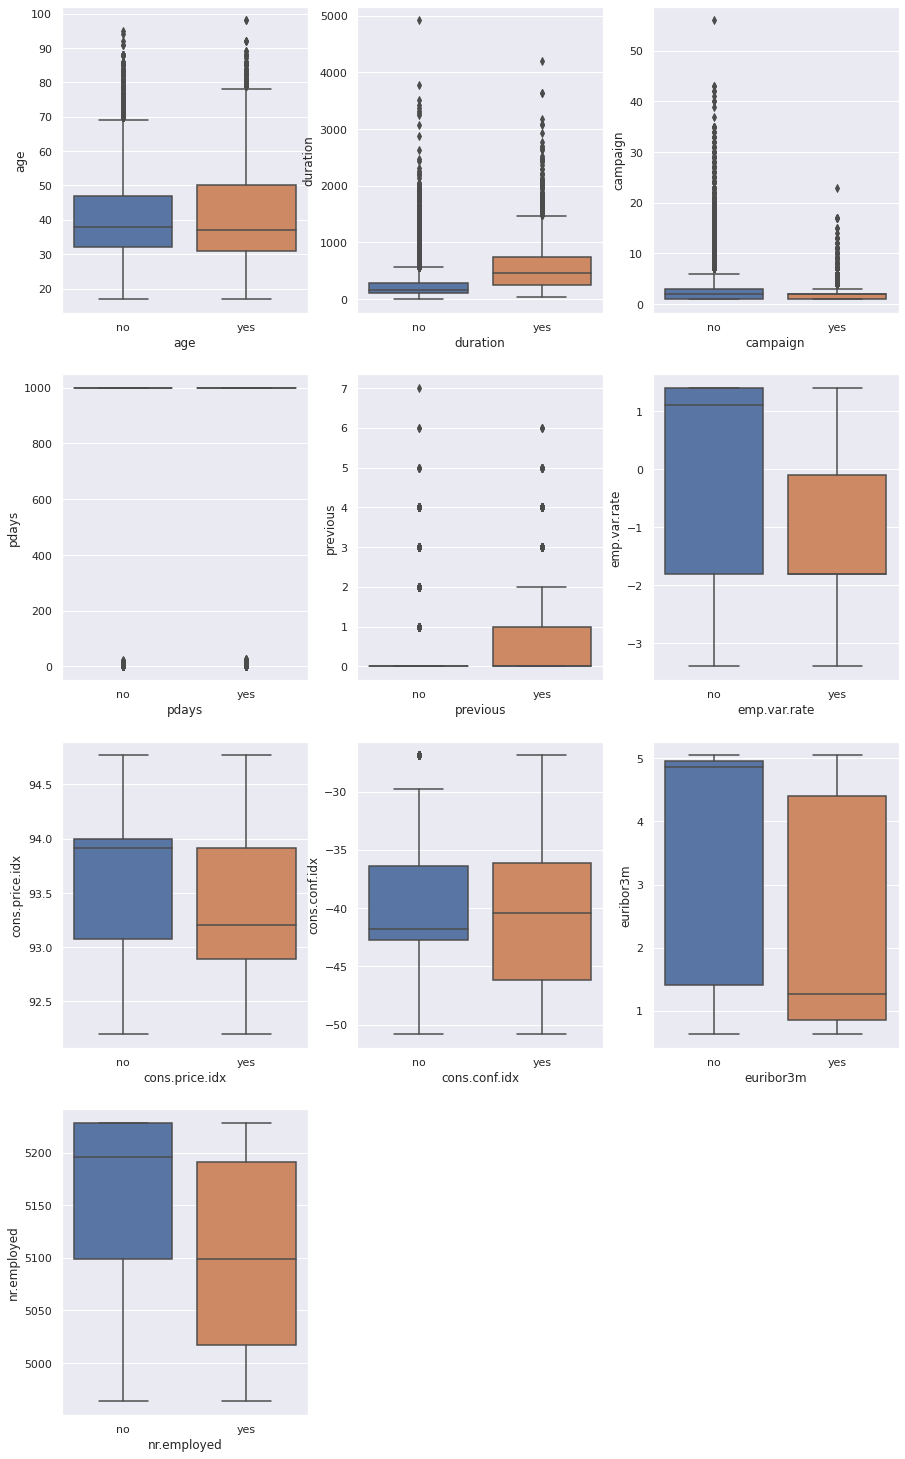

In [ ]:
fig = plt.figure(figsize = (15,80))
plotnumber =1
for feature in numericalFeature:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y=feature, data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

### Correlation coefficient

In [ ]:
df['deposit'] = df['y']
df.replace({'deposit': {'no': 0, 'yes': 1}}, inplace = True)

In [ ]:
print('correlation coefficient between y and 10 relative attributes')
pd.DataFrame(df.corr()['deposit']).style.background_gradient()

correlation coefficient between y and 10 relative attributes


,deposit
age,0.030399
duration,0.405274
campaign,-0.066357
pdays,-0.324914
previous,0.230181
emp.var.rate,-0.298334
cons.price.idx,-0.136211
cons.conf.idx,0.054878
euribor3m,-0.307771
nr.employed,-0.354678


### Take-away:<br>
- Categorical:<br>
Take a further look.we determine that several of the following variables arre of no consequence to the marketing campaign's. For example. feature housing, loan, contact is involving deposit.
- Numerical:<br>
favorable: age, previous, cons.conf.idx<br>
inverse: campaign, pdays, emp.var.rate, cons.price.idx, nr.employed

# VI. Reducing reduntant data <br>

In [ ]:
cols_to_include = ['age', 'job','marital', 'education', 'default','month', 'cons.price.idx', 'euribor3m', 'campaign', 'poutcome', 'deposit']

data = df[cols_to_include]
data.head()

,age,job,marital,education,default,month,cons.price.idx,euribor3m,campaign,poutcome,deposit
0,56,housemaid,married,basic.4y,no,may,93.994,4.857,1,nonexistent,0
1,57,services,married,high.school,unknown,may,93.994,4.857,1,nonexistent,0
2,37,services,married,high.school,no,may,93.994,4.857,1,nonexistent,0
3,40,admin.,married,basic.6y,no,may,93.994,4.857,1,nonexistent,0
4,56,services,married,high.school,no,may,93.994,4.857,1,nonexistent,0


In [ ]:
def deposit_age():
    bins = [18, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]
    names = ['18-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75+']
    dic = dict(enumerate(names, 1))
    data['group_age'] = np.vectorize(dic.get)(np.digitize(df['age'],bins))
    yesDeposit = data.loc[data['deposit'] == 1].groupby('group_age')[['deposit']].count()
    noDeposit = data.loc[data['deposit'] == 0].groupby('group_age')[['deposit']].count()
    
    yesDeposit.rename(columns={'deposit':'Deposit'}, inplace=True)
    noDeposit.rename(columns={'deposit':'no Deposit'}, inplace=True)
    
    merged_df = pd.concat([yesDeposit, noDeposit], axis = 1)
    
    merged_df.loc['Total'] = merged_df.sum(numeric_only=True, axis=0)
    
    merged_df['% of Deposits'] = round((merged_df['Deposit'] / (merged_df['Deposit'] \
                                                                + merged_df['no Deposit']))* 100, 2)
    return merged_df.style.format("{:,.0f}")
deposit_age()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Deposit,no Deposit,% of Deposits
group_age,,,
18-20,32,38,46
20-25,222,771,22
25-30,666,"3,935",14
30-35,"1,000","8,085",11
35-40,715,"7,138",9
40-45,453,"5,194",8
45-50,381,"4,498",8
50-55,372,"3,453",10
55-60,325,"2,712",11


### Take-away:<br>
- We can see. Age from 65 to 75+ and 18 to 25 having rate deposit higher than other age.

In [ ]:
def marital_deposit():
    yesDeposit = data.loc[data['deposit'] == 1].groupby('marital')[['deposit']].count()
    noDeposit = data.loc[data['deposit'] == 0].groupby('marital')[['deposit']].count()
    
    yesDeposit.rename(columns={'deposit':'Deposit'}, inplace=True)
    noDeposit.rename(columns={'deposit':'no Deposit'}, inplace=True)
    
    merged_df = pd.concat([yesDeposit, noDeposit], axis = 1)
    
    merged_df.loc['Total'] = merged_df.sum(numeric_only=True, axis=0)
    
    merged_df['% of Deposits'] = round((merged_df['Deposit'] / (merged_df['Deposit'] \
                                                                + merged_df['no Deposit']))* 100, 2)
    return merged_df.style.format("{:,.0f}")

marital_deposit()

,Deposit,no Deposit,% of Deposits
marital,,,
divorced,476,"4,136",10
married,"2,532","22,396",10
single,"1,620","9,948",14
unknown,12,68,15
Total,"4,640","36,548",11


### Take-away:<br>
- we can see. divorced and married having rate deposit less than single.



In [ ]:
summary_stats = round(data.describe().T,2)
summary_stats.drop(['count'], axis=1, inplace=True)
summary_stats.rename (columns={'mean':'Mean', 'std': 'Standard Deviation', 'min': 'Minimum', \
                               '25%':'Q1', '50%': 'Median', '75%':'Q3', 'max':'Maximum'}, inplace=True)
summary_stats

,Mean,Standard Deviation,Minimum,Q1,Median,Q3,Maximum
age,40.02,10.42,17.00,32.00,38.00,47.00,98.00
cons.price.idx,93.58,0.58,92.20,93.08,93.75,93.99,94.77
euribor3m,3.62,1.73,0.63,1.34,4.86,4.96,5.04
campaign,2.57,2.77,1.00,1.00,2.00,3.00,56.00
deposit,0.11,0.32,0.00,0.00,0.00,0.00,1.00


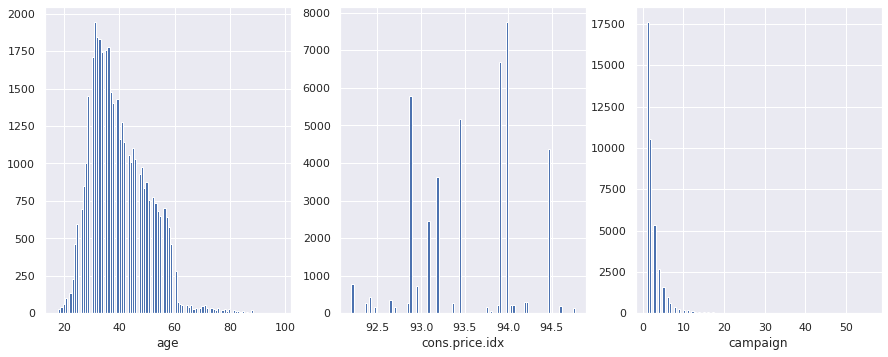

In [ ]:
name = ['age', 'cons.price.idx', 'campaign']
fig = plt.figure(figsize = (15,80))
plotnumber =1
for feature in name:
    ax = plt.subplot(12,3,plotnumber)
    plt.hist(data[feature], bins = 100)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

# VII. Standardized data

In [ ]:
# Computing IQR
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1-(1.5*IQR)
upper_bound = Q3+(1.5*IQR)

outliersData = data.loc[(data['age'] < lower_bound) | (data['age'] > upper_bound)]

In [ ]:
idxAge = outliersData.index

In [ ]:
data.drop(idxAge, axis = 0, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


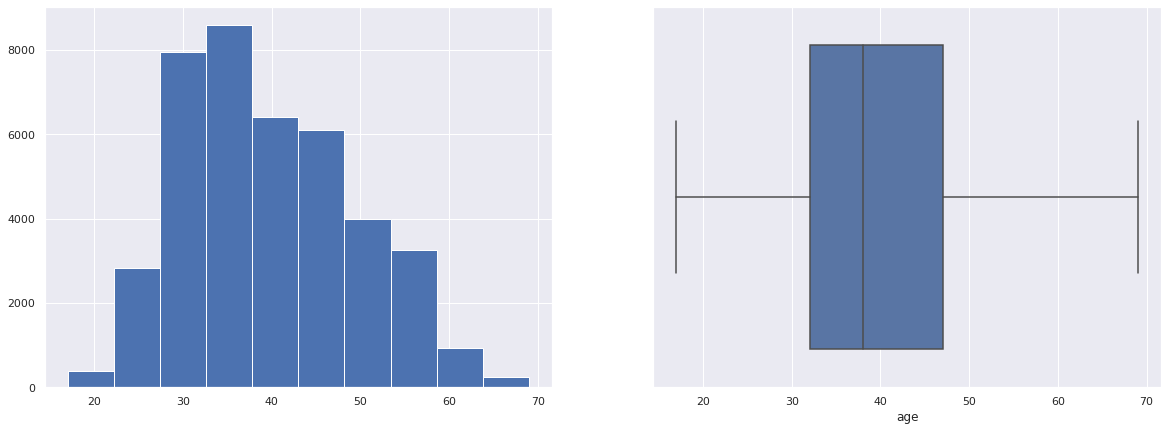

In [ ]:
fig = plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
plt.hist(data['age'])
plt.subplot(1,2,2)
sns.boxplot(data['age'])
plt.show()

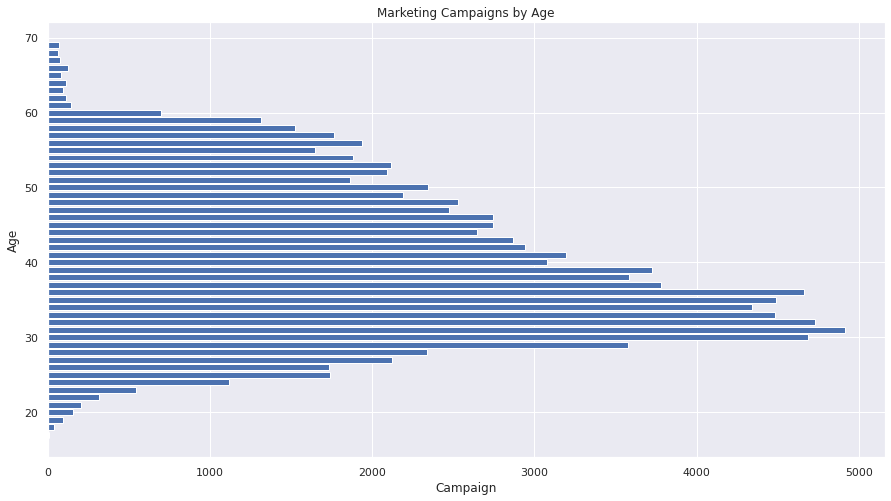

In [ ]:
campaign_age = data.groupby('age', as_index=False)['campaign'].sum()
fig = plt.figure(figsize = (15,8))
plt.barh(campaign_age['age'], campaign_age['campaign'])
plt.xlabel("Campaign")
plt.ylabel("Age")
plt.title("Marketing Campaigns by Age")
plt.show()

### Correlation coefficient

In [ ]:
data.head()

,age,job,marital,education,default,month,cons.price.idx,euribor3m,campaign,poutcome,deposit,group_age
0,56,housemaid,married,basic.4y,no,may,93.994,4.857,1,nonexistent,0,55-60
1,57,services,married,high.school,unknown,may,93.994,4.857,1,nonexistent,0,55-60
2,37,services,married,high.school,no,may,93.994,4.857,1,nonexistent,0,35-40
3,40,admin.,married,basic.6y,no,may,93.994,4.857,1,nonexistent,0,40-45
4,56,services,married,high.school,no,may,93.994,4.857,1,nonexistent,0,55-60


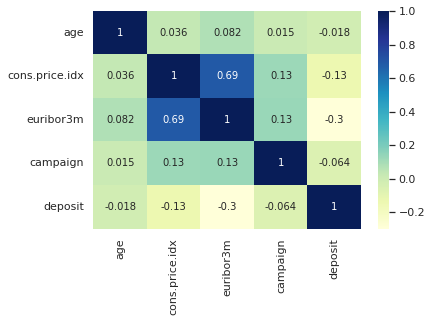

In [ ]:
# plotting correlation heatmap
dataplot = sns.heatmap(data[['age', 'cons.price.idx', 'euribor3m', 'campaign', 'deposit']].corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

# VIII. Building model predict

In [ ]:
missing_value(data)

,Name Columns,Total row,type col,Total unique,Total miss val,percentage missing value
0,age,40719,int64,53,0,0.0
1,job,40719,object,12,0,0.0
2,marital,40719,object,4,0,0.0
3,education,40719,object,8,0,0.0
4,default,40719,object,3,0,0.0
5,month,40719,object,10,0,0.0
6,cons.price.idx,40719,float64,26,0,0.0
7,euribor3m,40719,float64,316,0,0.0
8,campaign,40719,int64,42,0,0.0
9,poutcome,40719,object,3,0,0.0


In [ ]:
def convertStringToNumber(name, df):
    for n in name:
        x = df[n].unique()
        for i in range(len(x)):
            df[n] = df[n].replace(to_replace=x[i], value=i)

In [ ]:
obj = ['job', 'marital', 'education', 'default', 'poutcome']
convertStringToNumber(obj, data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
dict_month = {'may': 5,
              'jun': 6,
              'jul': 7,
               'aug': 8,
              'oct': 10, 'nov': 11, 'dec': 12, 'mar': 3, 'apr': 4, 'sep': 9 }
data['month'] = data.month.map(dict(dict_month))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data.drop(['group_age'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data.head()

,age,job,marital,education,default,month,cons.price.idx,euribor3m,campaign,poutcome,deposit
0,56,0,0,0,0,5,93.994,4.857,1,0,0
1,57,1,0,1,1,5,93.994,4.857,1,0,0
2,37,1,0,1,0,5,93.994,4.857,1,0,0
3,40,2,0,2,0,5,93.994,4.857,1,0,0
4,56,1,0,1,0,5,93.994,4.857,1,0,0


In [ ]:
missing_value(data)

,Name Columns,Total row,type col,Total unique,Total miss val,percentage missing value
0,age,40719,int64,53,0,0.0
1,job,40719,int64,12,0,0.0
2,marital,40719,int64,4,0,0.0
3,education,40719,int64,8,0,0.0
4,default,40719,int64,3,0,0.0
5,month,40719,int64,10,0,0.0
6,cons.price.idx,40719,float64,26,0,0.0
7,euribor3m,40719,float64,316,0,0.0
8,campaign,40719,int64,42,0,0.0
9,poutcome,40719,int64,3,0,0.0


In [ ]:
data.dropna(inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


## 0. Train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop('deposit', axis = 1)
y = data['deposit']

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape, y_train.shape,y_test.shape )

(32575, 10) (8144, 10) (32575,) (8144,)


## 1. Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
decision = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", decision)

Accuracy: 0.8486001964636543


              precision    recall  f1-score   support

           0       0.92      0.91      0.91      7254
           1       0.32      0.33      0.33       890

    accuracy                           0.85      8144
   macro avg       0.62      0.62      0.62      8144
weighted avg       0.85      0.85      0.85      8144



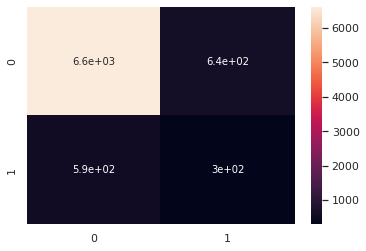

In [ ]:
print(classification_report(y_test,y_pred))

confusion_knn=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_knn,annot=True)

## 2.Logistics regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
modelLg = LogisticRegression()

modelLg.fit(X_train,y_train)

predLg = modelLg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# Model Accuracy, how often is the classifier correct?
lg =metrics.accuracy_score(y_test, predLg)
print("Accuracy:", lg)

Accuracy: 0.8946463654223968


              precision    recall  f1-score   support

           0       0.90      1.00      0.94      7254
           1       0.71      0.06      0.11       890

    accuracy                           0.89      8144
   macro avg       0.80      0.53      0.53      8144
weighted avg       0.88      0.89      0.85      8144



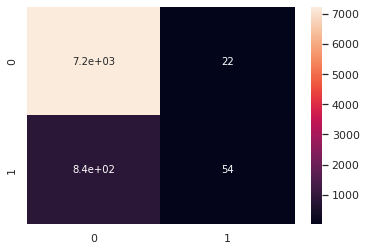

In [ ]:
print(classification_report(y_test,predLg))

confusion_Lg=confusion_matrix(y_test,predLg)
sns.heatmap(confusion_Lg,annot=True)

## 3. Support Vector Machines

In [ ]:
from sklearn import svm

In [ ]:
model_svm = svm.SVC()

model_svm.fit(X_train,y_train)

pred_svm = model_svm.predict(X_test)

In [ ]:
# Model Accuracy
svm = metrics.accuracy_score(y_test, pred_svm)
print("Accuracy:", svm)

Accuracy: 0.8907170923379175


              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7254
           1       0.00      0.00      0.00       890

    accuracy                           0.89      8144
   macro avg       0.45      0.50      0.47      8144
weighted avg       0.79      0.89      0.84      8144



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


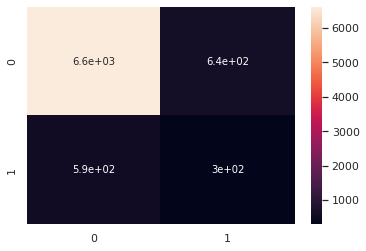

In [ ]:
print(classification_report(y_test,pred_svm))

confusion_svm = confusion_matrix(y_test,pred_svm)
sns.heatmap(confusion_knn,annot=True)

## 4. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
    # Set up a KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=neighbor)
  
    # Fit the model
    knn.fit(X_train, y_train)
  
    # Compute accuracy
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 0.9842210283960092, 2: 0.9222102839600921, 3: 0.9236838066001535, 4: 0.9114965464313124, 5: 0.9127244819646968, 6: 0.9074136607828089, 7: 0.9083346124328473, 8: 0.9043438219493477, 9: 0.9050498848810438, 10: 0.9022870299309286, 11: 0.9030237912509593, 12: 0.9010283960092095} 
 {1: 0.8481090373280943, 2: 0.887401768172888, 3: 0.8801571709233792, 4: 0.8901031434184676, 5: 0.8843320235756386, 6: 0.8903487229862476, 7: 0.8885068762278978, 8: 0.8915766208251473, 9: 0.8908398821218074, 10: 0.8913310412573674, 11: 0.8899803536345776, 12: 0.8918222003929273}


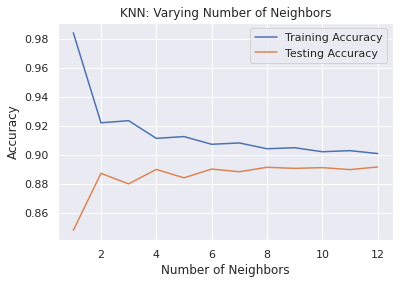

In [ ]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(list(neighbors), list(train_accuracies.values()), label="Training Accuracy")

# Plot test accuracies
plt.plot(list(neighbors), list(test_accuracies.values()), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

In [ ]:
# Set up a KNN Classifier
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train, y_train)

predKnn = knn.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
knn = metrics.accuracy_score(y_test, predKnn)
print("Accuracy:",knn)

Accuracy: 0.887401768172888


              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7254
           1       0.44      0.11      0.17       890

    accuracy                           0.89      8144
   macro avg       0.67      0.54      0.56      8144
weighted avg       0.85      0.89      0.86      8144



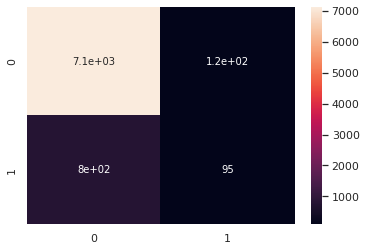

In [ ]:
print(classification_report(y_test,predKnn))

confusion_knn=confusion_matrix(y_test,predKnn)
sns.heatmap(confusion_knn,annot=True)

## 5. ANN

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
modelAnn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

In [ ]:
modelAnn.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [ ]:
predAnn = modelAnn.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
ann = metrics.accuracy_score(y_test, predAnn)
print("Accuracy:",ann)

Accuracy: 0.8907170923379175


              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7254
           1       0.00      0.00      0.00       890

    accuracy                           0.89      8144
   macro avg       0.45      0.50      0.47      8144
weighted avg       0.79      0.89      0.84      8144



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


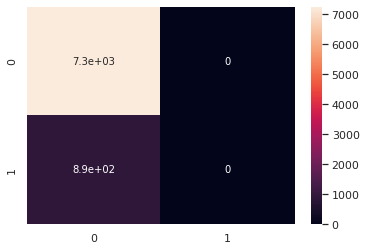

In [ ]:
print(classification_report(y_test,predAnn))

confusion_knn=confusion_matrix(y_test,predAnn)
sns.heatmap(confusion_knn,annot=True)

# IX. plot model predict

In [ ]:
valuePredict = [decision, lg, svm, knn, ann]
label = ['Decision Tree', 'Logistics regression', 'SVM', 'KNN', 'ANN']

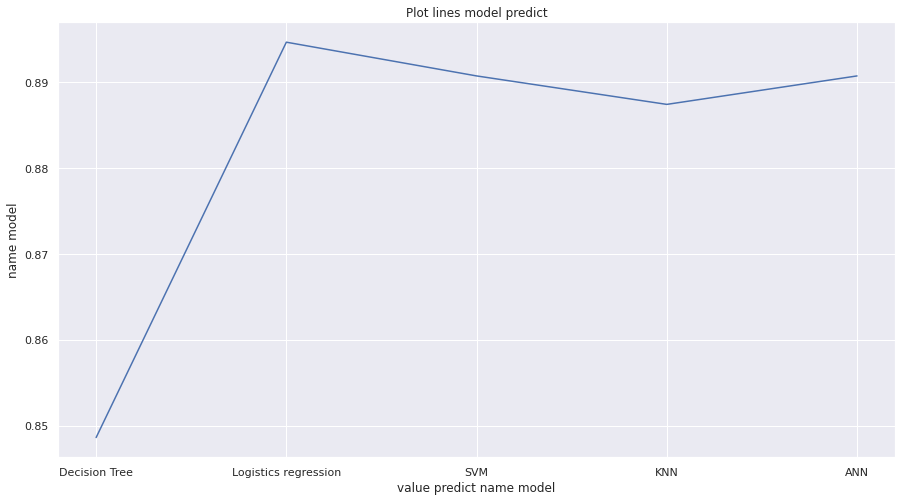

In [ ]:
fig = plt.figure(figsize = (15,8))
plt.title("Plot lines model predict")
sns.lineplot(x = label, y = valuePredict)
plt.xlabel("value predict name model")
plt.ylabel("name model")
plt.show()

we can see. model logistics regression having accuracy the best.